In [17]:
import numpy as np
import pycuda.driver as drv
import pycuda.autoinit
from pycuda.compiler import SourceModule
import matplotlib.pyplot as plt

In [18]:
GPUkernel = """

__global__ void render(float *disp, int img_w, int img_h)
{
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;

    if(row < img_h && col < img_w)
    {
        int pix_location = row * img_w * 3 + col * 3;

        disp[pix_location + 0] = float(col) / img_w;
        disp[pix_location + 1] = float(row) / img_h;
        disp[pix_location + 2] = float(row + col) / (img_w + img_h);
    }
}

"""

In [19]:
module = SourceModule(GPUkernel)
render = module.get_function("render")

img_w = 1920
img_h = 1080

n_pix = img_w * img_h
disp = np.zeros(3 * n_pix, dtype=np.float32)

threads = (16, 16, 1)
blocks = ((threads[0] + img_w - 1) // threads[0], (threads[1] + img_h - 1) // threads[1])

render(drv.Out(disp), np.int32(img_w), np.int32(img_h), block=threads, grid=blocks)

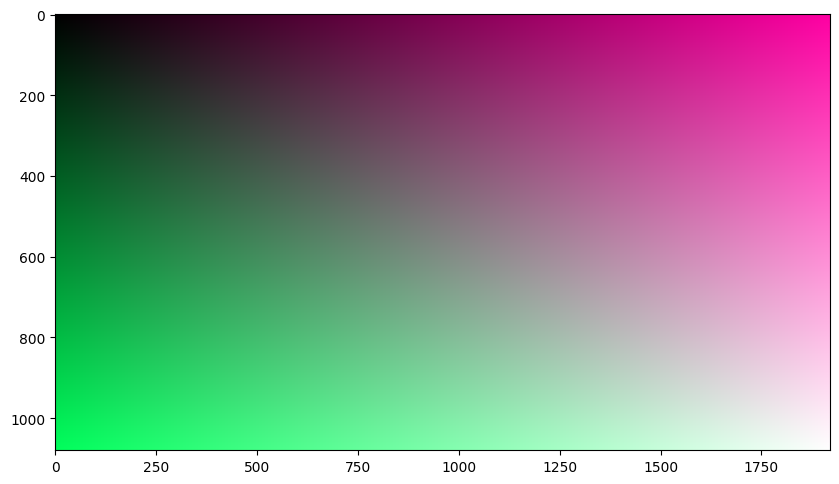

In [20]:
img = disp.reshape(img_h, img_w, 3)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.show()